# ProDy
## 10/05/2023

Original slides courtesy Ahmet Bakan

<a href="?print-pdf">print view</a>

In [1]:
%%html
<script src="https://bits.csb.pitt.edu/preamble.js"></script>

## Dynamics Analysis

ProDy can be used for

* Principal component analysis (PCA) of
  * NMR models
  * X-ray ensembles
  * Homologous structure ensembles
* Essential dynamics analysis (EDA) of trajectories
* Anisotropic and Gaussian network model (ANM/GNM) calculations
* Analysis of normal mode data from external programs

# PCA calculations

Let’s perform principal component analysis (PCA) of an ensemble of NMR models, such as 2k39. First, we prepare an ensemble:

In [2]:
from prody import *
import py3Dmol
ubi = parsePDB('2lz3')
print(ubi.numCoordsets())

21


In [3]:
showProtein(ubi)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Minimize the differences between each structure...

In [4]:
ubi_ensemble = Ensemble(ubi.calpha)
print("Before iterpose",ubi_ensemble.getRMSDs().mean())
ubi_ensemble.iterpose()
print("After iterpose",ubi_ensemble.getRMSDs().mean())

Before iterpose 8.253871223076873
After iterpose 0.7246260755875814


In [5]:
help(ubi_ensemble.iterpose)

Help on method iterpose in module prody.ensemble.ensemble:

iterpose(rmsd=0.0001, quiet=False) method of prody.ensemble.ensemble.Ensemble instance
    Iteratively superpose the ensemble until convergence.  Initially,
    all conformations are aligned with the reference coordinates.  Then
    mean coordinates are calculated, and are set as the new reference
    coordinates.  This is repeated until reference coordinates do not
    change.  This is determined by the value of RMSD between the new and
    old reference coordinates.  Note that at the end of the iterative
    procedure the reference coordinate set will be average of conformations
    in the ensemble.
    
    :arg rmsd: change in reference coordinates to determine convergence,
        default is 0.0001 Å RMSD
    :type rmsd: float



# What is PCA?

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. The number of principal components is less than or equal to the number of original variables. This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. The resulting vectors are an uncorrelated orthogonal basis set.  --Wikipedia

<img width="350" src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/15/GaussianScatterPCA.png/800px-GaussianScatterPCA.png">

In [6]:
%%html

<div id="pca" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="https://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#pca';
	jQuery(divid).asker({
	    id: divid,
	    question: "PCA works well for high-dimensional data.",
		answers: ['True','False'],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

# PCA calculations

In [7]:
pca = PCA('ubi')

pca.buildCovariance(ubi_ensemble)
cov = pca.getCovariance()

$$\mathrm{cov}(X,Y) = \frac{1}{n}\sum_i^n (x_i - \mu_x)(y_i - \mu_y)$$

We have $n$ observations of two variables $x$ and $y$.

In [8]:
%%html
<div id="prodyc" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="https://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#prodyc';
	jQuery(divid).asker({
	    id: divid,
	    question: "What is the shape of the covariance matrix? We have 21 conformations and 56 atoms.",
		answers: ["56x56","21x56","21x168","168x168","63x56"],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>


In [9]:
cov.shape

(168, 168)

# PCA Calculations

In [10]:
help(pca.calcModes)
pca.calcModes()

Help on method calcModes in module prody.dynamics.pca:

calcModes(n_modes=20, turbo=True) method of prody.dynamics.pca.PCA instance
    Calculate principal (or essential) modes.  This method uses
    :func:`scipy.linalg.eigh`, or :func:`numpy.linalg.eigh`, function
    to diagonalize the covariance matrix.
    
    :arg n_modes: number of non-zero eigenvalues/vectors to calculate,
        default is 20,
        if **None** or ``'all'`` is given, all modes will be calculated
    :type n_modes: int
    
    :arg turbo: when available, use a memory intensive but faster way to
        calculate modes, default is **True**
    :type turbo: bool



This analysis provides us with a description of the dominant changes in the structural ensemble. 

# PCA Calculations

Each mode is an eigenvector that transforms the original space.

In [11]:
pca[0].getEigval() #mode zero - has highest variance

18.283687760879424

In [12]:
pca[0].getVariance() #same as eigen value

18.283687760879424

In [13]:
pca[0].getEigvec() #these are the contributions of each coordinate to this mode

array([ 0.10895504, -0.09862288, -0.00069774,  0.12734766, -0.09529924,
        0.01728582,  0.09240989, -0.10821783, -0.00378215,  0.07455981,
       -0.09152148,  0.00040461,  0.08382771, -0.07502066,  0.01207025,
        0.07575377, -0.08990909,  0.00535893,  0.03427309, -0.07144482,
       -0.00699088,  0.04409968, -0.03099255,  0.00834164,  0.07587458,
       -0.04170089,  0.00526682,  0.05191522, -0.07196191,  0.00379224,
        0.02259604, -0.05094133,  0.00640529,  0.04676089, -0.02941339,
        0.00849644,  0.0464955 , -0.05902509,  0.00232354, -0.01470513,
       -0.03835522,  0.00499573, -0.00278386, -0.00494205,  0.0264534 ,
        0.0029671 , -0.00770994,  0.0295055 , -0.00796946, -0.01000113,
        0.01861126, -0.01755458,  0.01802547,  0.00189692,  0.00765933,
        0.04189029,  0.0244628 ,  0.00835689,  0.01903618,  0.02190465,
       -0.0441638 ,  0.03989105, -0.01788036, -0.02619707,  0.12531529,
       -0.02848483,  0.0543055 ,  0.13310853,  0.02580789, -0.00

# Variance

Let’s see the fraction of variance for top ranking 4 PCs:

In [14]:
for mode in pca[:4]:
    print(calcFractVariance(mode).round(2))

0.54
0.25
0.08
0.05


In [15]:
calcFractVariance(pca)

array([5.44746801e-01, 2.45008121e-01, 7.53087244e-02, 4.76585603e-02,
       2.48514775e-02, 1.89408289e-02, 1.10784476e-02, 8.86489115e-03,
       6.56613195e-03, 4.91503637e-03, 3.31646501e-03, 2.68053785e-03,
       2.10061548e-03, 1.53720323e-03, 8.39347607e-04, 5.63728260e-04,
       3.87769668e-04, 3.44092597e-04, 1.89852401e-04, 1.01367370e-04])

In [16]:
calcFractVariance(pca).sum()

1.0000000000000002

In [17]:
pca.getVariances()

array([1.82836878e+01, 8.22336538e+00, 2.52763522e+00, 1.59959496e+00,
       8.34106146e-01, 6.35723241e-01, 3.71833071e-01, 2.97538052e-01,
       2.20383316e-01, 1.64966531e-01, 1.11312651e-01, 8.99686184e-02,
       7.05043103e-02, 5.15941421e-02, 2.81715643e-02, 1.89207747e-02,
       1.30149631e-02, 1.15490015e-02, 6.37213842e-03, 3.40225833e-03])

In [18]:
pca.getVariances()/pca.getVariances().sum()

array([5.44746801e-01, 2.45008121e-01, 7.53087244e-02, 4.76585603e-02,
       2.48514775e-02, 1.89408289e-02, 1.10784476e-02, 8.86489115e-03,
       6.56613195e-03, 4.91503637e-03, 3.31646501e-03, 2.68053785e-03,
       2.10061548e-03, 1.53720323e-03, 8.39347607e-04, 5.63728260e-04,
       3.87769668e-04, 3.44092597e-04, 1.89852401e-04, 1.01367370e-04])

# Fluctuations

We can map the contributions of each mode back onto the atoms to get the fluctuations.  

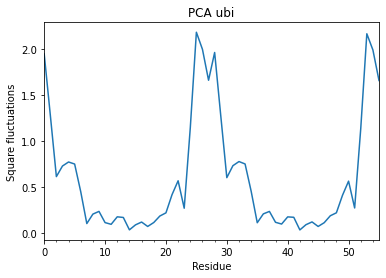

In [19]:
%matplotlib inline
showSqFlucts(pca);

In [20]:
showProtein(ubi,data=calcSqFlucts(pca))

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

# Projection

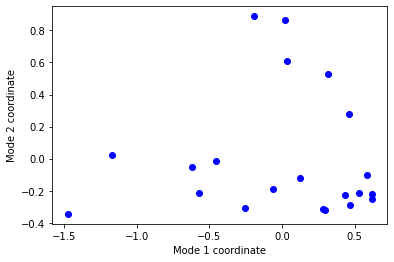

In [21]:
showProjection(ubi_ensemble, pca[:2]);

# Projection

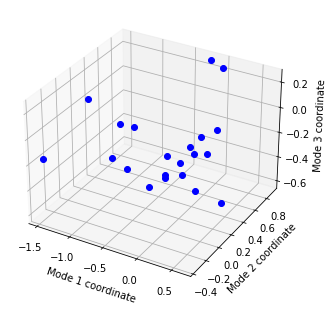

In [22]:
showProjection(ubi_ensemble, pca[:3]);

In [23]:
%%html
<div id="prodyp" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="https://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#prodyp';
	jQuery(divid).asker({
	    id: divid,
	    question: "What do the dots on the previous picture represent?",
		answers: ["Conformations","Atoms","Modes","Fluctuations","Covariance"],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

# Elastic Network Model

<img src="https://upload.wikimedia.org/wikipedia/commons/c/c8/Elastic_network_model.png">

Represent a protein a a network of mass and springs. Each point is a residue and springs connect nearby residues.  From the static structure, we infer inherent motion.

## ANM calculations

ANM considers the spatial relationship between protein residues.  Nearby atoms are connected with springs. Instead of a covariance matrix, a Hessian is built, and it works on a *single structure, not an ensemble*.

<img width="350" src="imgs/1tup.png">

Anisotropic network model (ANM) analysis can be performed in two ways:

The shorter way, which may be suitable for interactive sessions:

In [24]:
anm, atoms = calcANM(ubi, selstr='calpha')

The more controlled way goes as follows:

In [25]:
anm = ANM('Ubi')
anm.buildHessian(ubi.calpha)
anm.calcModes(n_modes=20)

# ANM

In [26]:
slowest_mode = anm[0]
print(slowest_mode)
print(slowest_mode.getEigval().round(3))

Mode 1 from ANM Ubi
0.082


In [27]:
len(slowest_mode.getEigvec())

168

In [28]:
calcFractVariance(anm)

array([0.24980938, 0.24410503, 0.08996715, 0.07112073, 0.03707691,
       0.03623665, 0.0321058 , 0.02797792, 0.02703105, 0.0237444 ,
       0.02140593, 0.01979188, 0.01878154, 0.01573741, 0.0154018 ,
       0.01493917, 0.01476959, 0.01402273, 0.01320577, 0.01276915])

In [29]:
oneubi = ubi
while oneubi.numCoordsets() > 1:
    oneubi.delCoordset(-1)
showProtein(oneubi,mode=slowest_mode,data=calcSqFlucts(anm),anim=True,scale=25)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

# Mode 2

In [30]:
showProtein(oneubi,mode=anm[1].getEigvec(),data=calcSqFlucts(anm),anim=True,amplitude=25)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Compare PCA and ANM

In [31]:
printOverlapTable(pca[:4], anm[:4])

Overlap Table
                      ANM Ubi
               #1     #2     #3     #4
PCA ubi #1    0.00  +0.74   0.00  +0.20
PCA ubi #2    0.00  +0.20   0.00  -0.36
PCA ubi #3   +0.01  +0.04   0.00  -0.26
PCA ubi #4   +0.01  +0.33   0.00  -0.07



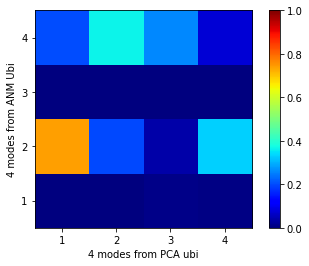

In [32]:
showOverlapTable(pca[:4], anm[:4]);

# Mode 1 of PCA
Compare to Mode 2 of ANM

In [33]:
showProtein(oneubi,data=calcSqFlucts(pca[0]),mode=pca[0].getEigvec(),anim=True,amplitude=25)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## ProDy Docs and Tutorials

See: https://prody.csb.pitt.edu/tutorials/

## Project

Use ProDy to identify the most variable residues as determined by PCA analysis from NMR ensembles. Given a pdb code (e.g. 2LZ3 or 2L3Y):
 * download the structure from the PDB, 
 * superpose the models of the ensemble (using iterpose with just the alpha carbons), 
 * calculate the PCA modes (again, just for the alpha carbons). 
 * Use calcSqFlucts to calculate the magnitude of these fluctuations for each atom.  
 * Print out the minimum and maximum squared fluctuation value 
 
 * Map these values back onto all the atoms of each corresponding residue by setting the B factors (setBetas).
 * View this pdb in py3Dmol and color by B factor with reasonable min/max
   * `view.setStyle({'cartoon':{'colorscheme':{'prop':'b','gradient':'sinebow','min':0,'max':70}}})`

In [34]:
import prody
import py3Dmol
import io

pdb = '2l3y' # 2lz3
prot = prody.parsePDB(pdb)
ensemble = prody.Ensemble(prot.ca)
ensemble.iterpose()
pca = prody.PCA()
pca.buildCovariance(ensemble)
pca.calcModes()
flucts = prody.calcSqFlucts(pca)
print("Min/Max Flucts %.2f %.2f"%(flucts.min(),flucts.max()))
prot.setBetas(0) #not actually necessary
prot.ca.setBetas(flucts)

#I feel like there should be a more succinct way to remove
#all but the first coordinate set, but I can't find it
n = len(prot.getCoordsets())
singleprot = prot
singleprot.delCoordset(range(1,n))

#instead of write to a file to get the pdb string, 
#can write to a stringIO, which acts like a file
pdbstr = io.StringIO()
prody.writePDBStream(pdbstr, singleprot)

view = py3Dmol.view()
view.addModel(pdbstr.getvalue())
view.setStyle({'cartoon':{'colorscheme':{'prop':'b','gradient':'sinebow','min':flucts.min(),'max':flucts.max()}}})
view.zoomTo()

Min/Max Flucts 0.33 144.97


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol